# Elucidating the correlations between cancer initiation times and lifetime cancer risks

## Teimouri H, Kochugaeva MP, Kolomeisky AB. Scientific Reports. 2019;9(1):1–8

Using a first-passage analysis the probabilities for the cancer to appear and the times before it happens, which are viewed as fixation probabilities and fixation times, respectively, are explicitly calculated. It is predicted that the slowest cancer initiation dynamics is observed for neutral mutations, while it is fast for both advantageous and, surprisingly, disadvantageous mutations. The method is applied for estimating the cancer initiation times from experimentally available lifetime cancer risks for different types of cancer. It is found that the higher probability of the cancer to occur does not necessary lead to the faster times of starting the cancer. 


<img src="figure1.png" style="height:200px">

Figure1: Top: A schematic view of a single mutation fixation process in the tissue compartment. Normal stem cells are green, while mutated cells are yellow. Bottom: Corresponding discrete-state stochastic model.



## Fixation time and fixation probability 

A critically important feature of the cancer initiation process is how long does it take to reach the cancer starting point, which can be defined as a cancer initiation time. In our language, it corresponds to the fixation time for the mutation that activates the oncogene. More specifically, it is given by $T_1$, which is as a conditional mean first-passage time to reach the fixation state ($n=N$) from the state with initially $n=1$ mutated cells before the mutation can be eliminated from the system ($n=0$). From biological point of view, the cancer initiation time can be interpreted as the average time interval between the occurrence of the initial mutation and the state when all cells in the tissue compartment become mutated. Our explicit calculations provide the following expression,



$T_1 = \frac{N+1}{r(1 -r^{-N})}\sum_{j=1}^{N-1}\sum_{l=0}^{j-1}\frac{(r^{-l} - r^{-j})}{(j-l)(N-j+l)} $
 
 
 
 While the fixation probability is given by:
 
 $\pi_{1} = \frac{1-1/r}{1-1/r^{N}}$

### Heat maps for the fixation probability

We present the fixation probability $\pi_1$ for different values of the parameters $r$ and $N$.

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in power
  if __name__ == '__main__':
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in power
  if __name__ == '__main__':
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


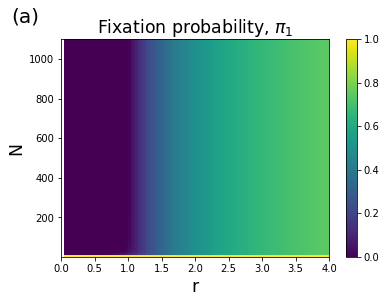

In [35]:
import numpy as np
import matplotlib.pyplot as plt
Nb=1100
n_points = 100
x_points = 100
r = np.linspace(0, 4, x_points)
N = np.linspace(1, Nb, n_points,dtype=int)
r, N = np.meshgrid(r, N)
fn = (1 - 1/r)/(1 - r**(-N))  

fig, ax = plt.subplots()
im = ax.pcolormesh(r, N, fn)

fig.colorbar(im)
ax.set_xlabel('r', fontsize='xx-large')
ax.set_ylabel('N', fontsize='xx-large')   
ax.axis('tight')
ax.set_title('Fixation probability, $\pi_{1}$', fontsize='xx-large')
plt.figtext(0.01,0.94,'(a)',size=20)
fig.savefig('fixation_prob_heatmap.pdf')
plt.show()

### Heatmap for the fixation time

We present the fixation time $T_1$ for different values of the parameters $r$ and $N$.

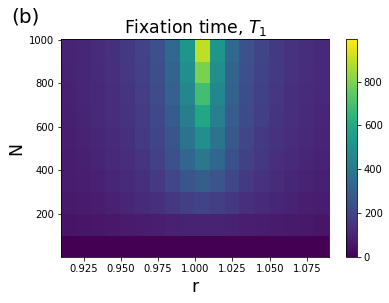

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from array import array
Nb=1100
n_points = 100
r_points = 20
r = np.linspace(0.9, 1.1, r_points)
N = np.linspace(1,Nb, n_points,dtype=int)
r, N = np.meshgrid(r, N)
a=0.2
f = open("fixation_time.txt", "w")

for rr in range(1,r_points):
    for n in range(1,Nb,n_points):
        ri = 0.9 + (rr/r_points)*a
        if ri==1:
            T1 = ((n+1)/n)*(sum (sum( 1/(n-j+l)  for l in range(0, j-1) ) for j in range(1, n-1)))
        else:
            T1 = ((n+1)/(ri*(1 - 1.0/(ri**n))))*(sum (sum( (1/(ri**l) - 1/(ri**j))/((j-l)*(n-j+l))  for l in range(0, j-1) ) for j in range(1, n-1)))
            
        f.write("%s " % n)
        f.write("%s " % ri)
        f.write("%s\n" % T1)

X1, Y1, Z1 = [], [], []
for line in open('fixation_time.txt', 'r'):
    values = [float(s) for s in line.split()]
    X1.append(values[0])
    Y1.append(values[1])
    Z1.append(values[2])
    
XX1, YY1 = np.meshgrid(X1, Y1)
ZZ1 = griddata((X1, Y1), Z1, (XX1, YY1), method='linear')

fig, ax = plt.subplots()   
im = ax.pcolormesh(YY1,XX1,ZZ1)
fig.colorbar(im)
ax.set_xlabel('r', fontsize='xx-large')
ax.set_ylabel('N', fontsize='xx-large')   
ax.axis('tight')
ax.set_title('Fixation time, $T_{1}$', fontsize='xx-large')
plt.figtext(0.01,0.94,'(b)',size=20)
fig.savefig('fixation_time_heatmap.pdf')

## Estimating the cancer initiation times for different types of cancer:

We apply our first-passage method for estimating the cancer initiation times from experimentally available lifetime cancer risks for different types of cancer (data are adapted from Tomasetti, C. & Vogelstein, B. Variation in cancer risk among tissues can be explained by the number of stem cell divisions. Sci. 347, 78–81 (2015). 

In [11]:
import pandas as pd
df = pd.read_csv("/Users/hamidteimouri/Desktop/rice_projects/cancer1/data/data_variation15.csv")
df

,cancer type,LTR,Number of initial stem cells,division rate
0,acute myeloid leukemia,0.004100,1.350000e+08,12.0000
1,Basal cell carcinoma,0.300000,5.820000e+09,7.6000
2,Chronic lymphocytic leukemia,0.005200,1.350000e+08,12.0000
3,Colorectal adenocarcinoma,0.048000,2.000000e+08,73.0000
4,colorectal adenocarcinoma with FAP,1.000000,2.000000e+08,73.0000
5,Colorectal adenocarcinoma with lynch syndrom,0.500000,2.000000e+08,73.0000
6,duodenum adenocarcinoma,0.000300,4.000000e+06,24.0000
7,Duodenum adenocarcinoma with FAP,0.035000,4.000000e+06,24.0000
8,Esopphageal squamous cell carcinom,0.001938,8.640000e+05,17.4000
9,Gallbladder non papillary adenocarcinoma,0.002800,1.600000e+06,0.5840


In [13]:
## Removing Nan values 
df=df.dropna()
df = df.reset_index(drop=True)
#df

### Estimation of fitness parameters for different types of cancer

First we must estimate the fitness parameter $r$ for each cancer type. As shown in the paper fitness parameter $r$ is given by:


$ r  \simeq 1 + \left[ \frac{R_{\text{ltr}}}{b T_{\text{life}} \mu Q_{\text{pr}}} \right]\frac{1}{N} $


### Estimation of the fixation times and times before the first mutation appears

As shown in the paper, for very large number of stem cells initiation time $T_1$ is given by:

$ T_1 =  \frac{1}{r(1-r^{-N})} \left[\text{Ei}\left(-\frac{R_{\text{ltr}}}{b T_{\text{life}}\mu Q_{\text{pr}}  N } \right)\right]\frac{1}{b}
 + \frac{2 \mu Q_{\text{pr}} N}{r(1-r^{-N})R_{\text{ltr}}}\left[\gamma + \ln{\left(\frac{R_{\text{ltr}}}{b T_{\text{life}}\mu Q_{\text{pr}}} \right)}\right] T_{\text{life}} $

And the time before the first mutation apears $t_0$ is given by:

$ t_{0}=\frac{T_{\text{life}}}{Nb T_{\text{life}} \mu}=\frac{1}{N b \mu} $

### Definitiations:
$R_{\text{ltr}}$ :  Cancer lifetime risk \
$Q_{\text{pr}}$ : Probability of cancer progression \
$N$ : number of stems in a tissue \
$b$ : cell division rate (in per years) \
$\mu$ : mutation probability      \
$T_{\text{life}}$ :  average human lifetime    \
$\gamma$ : The Euler-Mascheroni constant



In [15]:
import math
from scipy.special import expi
import numpy as np
gama = 0.577
Q_pr = 0.001
mu=3.e-8
T_l=80
df=df.rename(columns={"Number of initial stem cells": "N"})
df['r'] = 1 + df['LTR']/(df['division rate']*df['N']*T_l*Q_pr*mu)
df['Fixation time'] = (((2.0*T_l*mu*Q_pr*df['N'])/(df['LTR']))*( gama + np.log((df['r']-1)*df['N'])) + (expi(-(df['r']-1)))/df['division rate'])/((1-df['r']**(-df['N']))*df['r']) 
df


,cancer type,LTR,N,division rate,r,Fixation time
0,acute myeloid leukemia,0.004100,1.350000e+08,12.0000,1.001055,1964.025954
1,Basal cell carcinoma,0.300000,5.820000e+09,7.6000,1.002826,1595.775674
2,Chronic lymphocytic leukemia,0.005200,1.350000e+08,12.0000,1.001337,1577.608600
3,Colorectal adenocarcinoma,0.048000,2.000000e+08,73.0000,1.001370,261.515001
4,colorectal adenocarcinoma with FAP,1.000000,2.000000e+08,73.0000,1.028539,15.019136
5,Colorectal adenocarcinoma with lynch syndrom,0.500000,2.000000e+08,73.0000,1.014269,29.180200
6,duodenum adenocarcinoma,0.000300,4.000000e+06,24.0000,1.001302,583.628211
7,Duodenum adenocarcinoma with FAP,0.035000,4.000000e+06,24.0000,1.151910,6.564290
8,Esopphageal squamous cell carcinom,0.001938,8.640000e+05,17.4000,1.053713,22.862907
9,Gallbladder non papillary adenocarcinoma,0.002800,1.600000e+06,0.5840,2.248573,18.288666


### Fixation time vs lifetime risk for different types of cancer


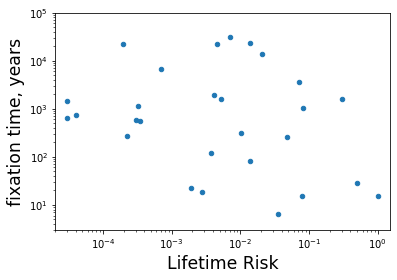

In [16]:
import numpy as np
import matplotlib.pyplot as plt
p1=df.plot.scatter(y='Fixation time',x='LTR',loglog=True)
p1.set_xlabel('Lifetime Risk', fontsize='xx-large')
p1.set_ylabel('fixation time, years', fontsize='xx-large')   
p1.axis('tight')
plt.xlim([2*10e-6, 1.5])
plt.ylim([3*10e-1, 10e4])
plt.savefig('risk.pdf')

### Correlation between cancer initiation times and lifetime risks


In [35]:
from scipy.stats import ttest_ind
import scipy.stats  as stats
stats.spearmanr(df['LTR'], df['Fixation time'])

SpearmanrResult(correlation=-0.19871356419836864, pvalue=0.31072185509095046)

### Fixation time $T_1$ over $\mu$-$Q_{pr}$ parameter space

Since our theoretical predictions depend strongly on the probability of cancer progression ($Q_{pr}$) and the probability of the appearance of mutation ($\mu$), which are not well determined in the literature, we varied these parameters as shown in the following:

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in power


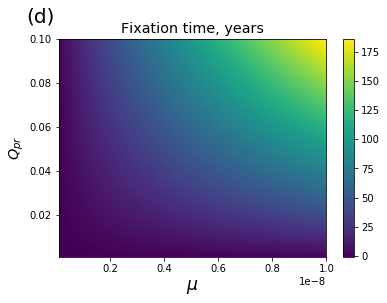

In [88]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expi
n_points = 100
x_points = 100
Nb = 100
delta2 = 1/Nb
t = 80
gama = 0.577
N = 4.0e+06
Rlr = 0.035
b = 24

mu = np.linspace(1.0e-10, 1.0e-8, x_points)
#mu = np.linspace(1, Nb, x_points)*delta1
Qpr = np.linspace(0.001, 0.10, n_points)
mu, Qpr = np.meshgrid(mu, Qpr)
#fn = a + b # Vectorize your cost function

epsilon=Rlr/(N*mu*b*t*Qpr)
r=1/(1-epsilon)
#t1 = ((expi(-np.log(r)))*(1-1/r)/(np.log(r)) + (2.0/(np.log(r)))*(gama + np.log(N*(np.log(r)))))/(r*(1-r**(-N)))
t1 = (expi(-Rlr/(N*mu*b*t*Qpr)) + ((2.0*mu*b*t*N*Qpr)/Rlr)*(gama + np.log(Rlr/(mu*b*t*Qpr))))/(r*(1-r**(-N))*b)


fig, ax = plt.subplots()
im = ax.pcolormesh(mu, Qpr, t1)
fig.colorbar(im)
ax.set_xlabel('$\mu$', fontsize='xx-large')
ax.set_ylabel('$Q_{pr}$', fontsize='x-large')   
ax.axis('tight')
ax.set_title('Fixation time, years', fontsize='x-large')
plt.figtext(0.05,0.94,'(d)',size=20)
fig.savefig('Duodenum_adenocarcinoma_FAP.pdf', bbox_inches="tight")
plt.show()